Generated Dataset Preview:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  37.454012  26.170568  57.199588  64.825695  72.026792  37.364082   
1  95.071431  24.697880  80.543233  17.238636  68.728300  33.291210   
2  73.199394  90.625458  76.016093  87.239456   9.575420  17.615391   
3  59.865848  24.954620  15.389990  61.311624  92.257240  60.726667   
4  15.601864  27.194973  14.924947  15.720388  56.847220  47.662416   

   Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0  65.430632   7.317510   0.440161   64.569067   72.999831   76.463599   
1   8.003257   8.947838   0.033016   40.241849   18.451200    0.651632   
2  24.232981  65.197371  47.226346   47.190911   34.663969   47.704994   
3  77.367935  48.694071   2.929371   71.672478   66.328064   79.390440   
4  52.868585  79.041525  97.453255   87.630603   48.208934   63.004472   

   Feature_13  Feature_14  Feature_15  Regression_Target  \
0   68.552802    6.057008   74.587955    

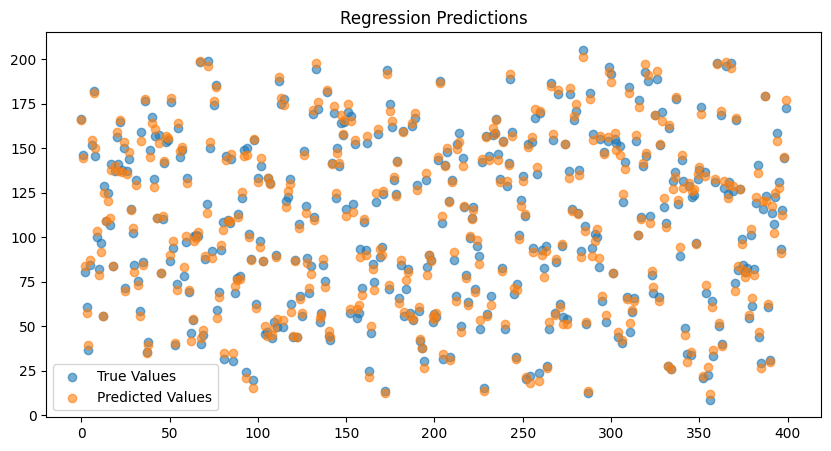

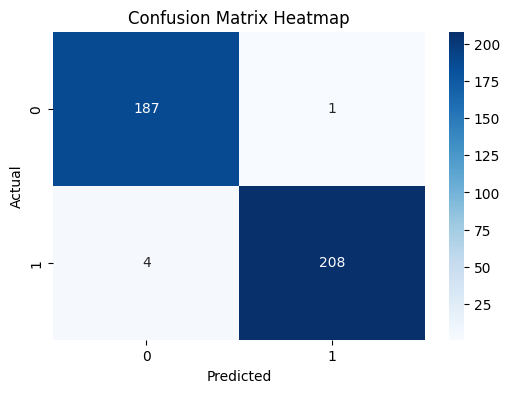

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score
import seaborn as sns

# Step 1: Generate Synthetic Dataset
np.random.seed(42)
# Create 15 features (columns) with random data
num_samples = 2000
X = pd.DataFrame({
    f"Feature_{i+1}": np.random.rand(num_samples) * 100 for i in range(15)
})
# Add a continuous target for regression
y_regression = X["Feature_1"] * 0.5 + X["Feature_2"] * 1.5 + np.random.rand(num_samples) * 10
# Add a binary classification target (0 or 1)
y_classification = (y_regression > np.mean(y_regression)).astype(int)

# Combine data into one dataframe for clarity
data = X.copy()
data["Regression_Target"] = y_regression
data["Classification_Target"] = y_classification

print("Generated Dataset Preview:")
print(data.head())

# Step 2: Split Dataset for Training and Testing
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Step 3: Train Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train_reg)
y_pred_reg = reg_model.predict(X_test)

# Step 4: Train Classification Model
clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train_clf, y_train_clf)
y_pred_clf = clf_model.predict(X_test_clf)

# Step 5: Evaluate Regression Model
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("\nRegression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Step 6: Evaluate Classification Model
accuracy = accuracy_score(y_test_clf, y_pred_clf)
clf_report = classification_report(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

print("\nClassification Model Evaluation:")
print(f"Classification Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(clf_report)
print("Confusion Matrix:")
print(conf_matrix)

# Step 7: Plot Results
# Regression Predictions
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test_reg)), y_test_reg, label="True Values", alpha=0.6)
plt.scatter(range(len(y_pred_reg)), y_pred_reg, label="Predicted Values", alpha=0.6)
plt.title("Regression Predictions")
plt.legend()
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Classification Metrics
classification_accuracy = accuracy_score(y_test_class, y_pred_class)
classification_report_output = classification_report(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

print(f"Classification Accuracy: {classification_accuracy:.4f}")
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(conf_matrix)

# Regression Metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"\nMean Squared Error (Regression): {mse:.4f}")


Classification Accuracy: 0.6050
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.51      0.54        92
           1       0.62      0.69      0.65       108

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.60      0.60      0.60       200

Confusion Matrix:
[[47 45]
 [34 74]]

Mean Squared Error (Regression): 8.7520


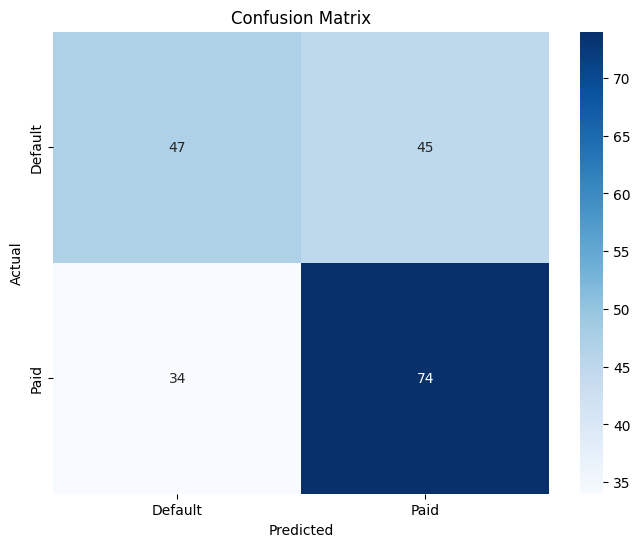

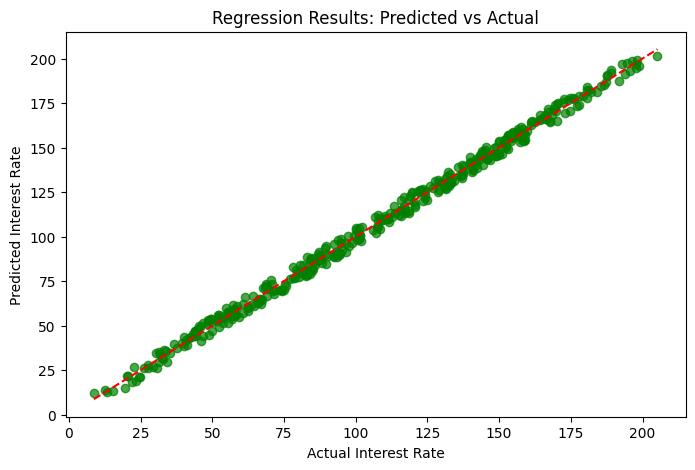

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Default', 'Paid'], yticklabels=['Default', 'Paid'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Regression Results Graph
plt.figure(figsize=(8, 5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7, color='green')
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.title('Regression Results: Predicted vs Actual')
plt.xlabel('Actual Interest Rate')
plt.ylabel('Predicted Interest Rate')
plt.show()